In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_rd = pd.read_excel('CRP_Data_1.xlsx')

In [3]:
criteria = 50

In [4]:
raw_df_data = df_rd[df_rd['C']>criteria]

In [5]:
#raw_df_data_1 = raw_df_data.apply(lambda x:x**1, axis=0)

In [6]:
def normalize(df):
    return df.std(),df.mean(),df.apply(lambda x:(x-x.mean())/x.std(),axis=0) 

In [7]:
std, mean, df_data = normalize(raw_df_data)

In [8]:
df_data['B']=1

In [9]:
df_A = df_data[list(df_data.columns)[1:]]

In [10]:
df_y = df_data['C']

In [11]:
len(df_y)

38320

In [12]:
A = df_A.to_numpy()
y = df_y.to_numpy()

In [13]:
M = np.dot(A.T,A)

In [14]:
inv_M = np.linalg.inv(M)

In [15]:
W = np.dot(np.dot(inv_M,A.T),y)

In [16]:
W

array([ 4.21303737e-01, -3.24576728e-01,  2.75653168e-01,  1.76570797e-01,
       -5.05642121e-02,  3.60578505e-01,  1.99734374e-01,  4.41453691e-02,
       -4.77210285e-13])

In [39]:
y_hat = np.dot(A,W)

In [40]:
r_yh = y_hat*std['C']+mean['C']
#r_yh = np.sqrt(r_yh)

In [41]:
Y = raw_df_data['C'].to_numpy()
diffs =Y-r_yh

In [42]:
diffs = np.nan_to_num(diffs)

In [43]:
diffs.std(),diffs.mean()

(10.709750829124392, 2.485297723112251e-16)

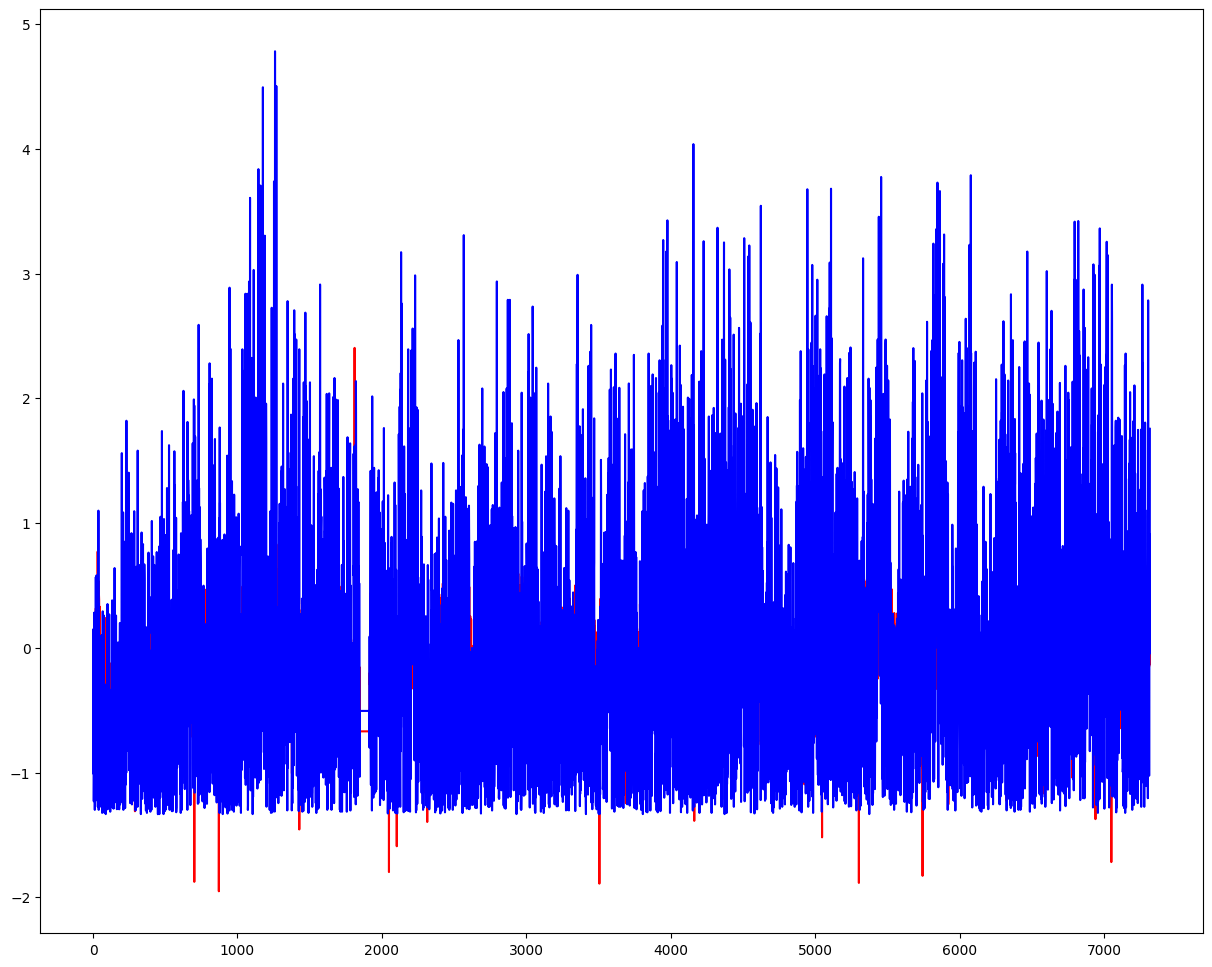

In [44]:
plt.figure(figsize=(15,12))
plt.plot(range(len(y_hat)),y_hat,'r')
plt.plot(range(len(y)),y,'b')

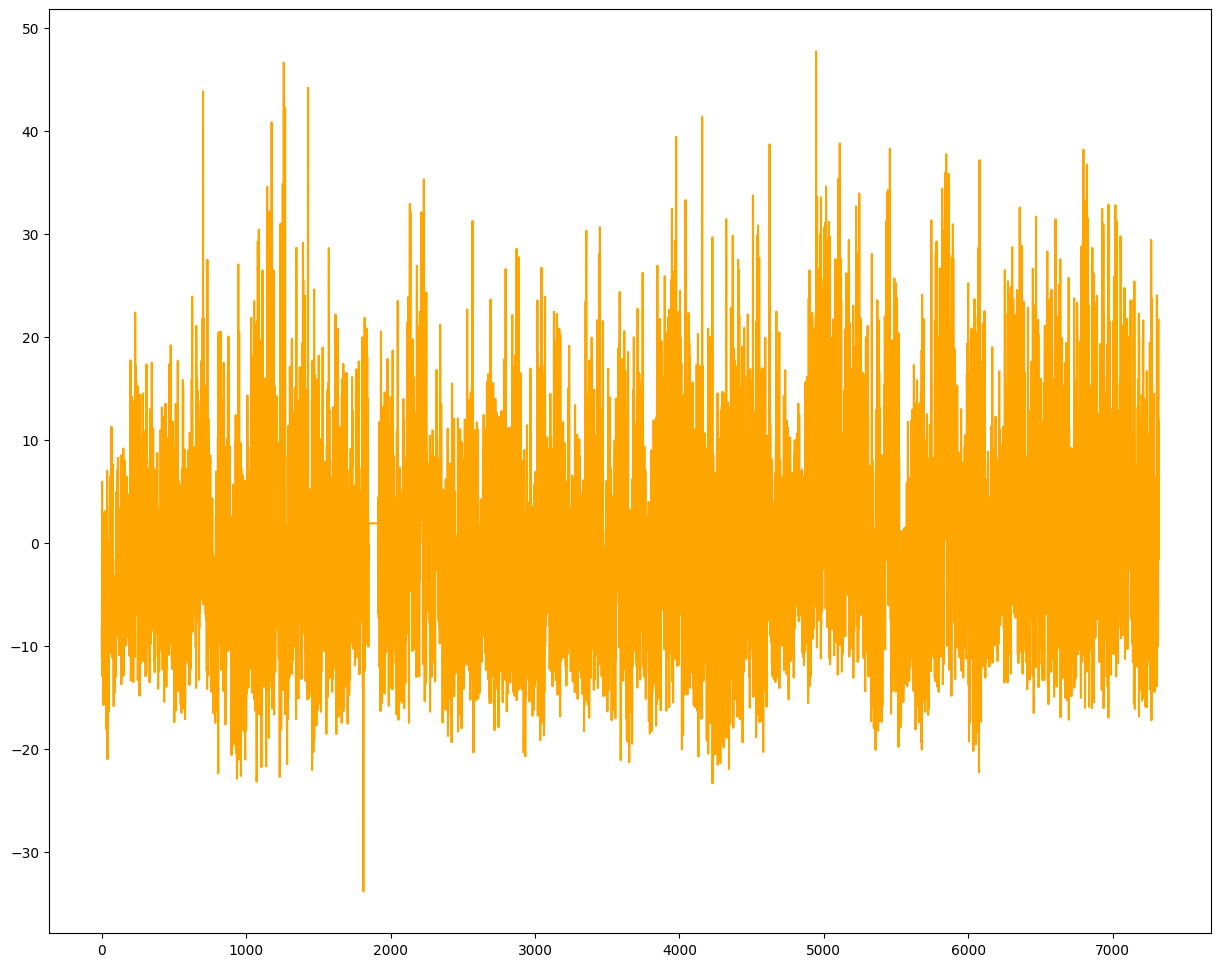

In [45]:
plt.figure(figsize=(15,12))
plt.plot(range(len(diffs)),diffs,'orange')